<a href="https://colab.research.google.com/github/AreLunelle/PhytonSQL/blob/main/Redes_Neuronales_Practica_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Cargar las librerias

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential #modelo en el que se apilan capas unas a otras
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical

Cargar y preparar los datos

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalizamos los datos: de 0-255 a 0-1
x_train = x_train / 255.0
x_test = x_test / 255.0

# Convertimos las etiquetas a formato categórico (one-hot encoding)
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Crear el modelo

In [3]:
model = Sequential([
    Flatten(input_shape=(28, 28)),      # Aplana la imagen
    Dense(128, activation='relu'),     # Capa oculta con 128 neuronas
    Dense(10, activation='softmax')    # Capa de salida (10 dígitos)
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Compilar el modelo

In [5]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Entrenar el modelo

In [6]:
model.fit(x_train, y_train, epochs=5, batch_size=32, validation_split=0.2)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8652 - loss: 0.4793 - val_accuracy: 0.9585 - val_loss: 0.1502
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9616 - loss: 0.1308 - val_accuracy: 0.9690 - val_loss: 0.1161
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9741 - loss: 0.0892 - val_accuracy: 0.9697 - val_loss: 0.1029
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9809 - loss: 0.0623 - val_accuracy: 0.9735 - val_loss: 0.0957
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9865 - loss: 0.0462 - val_accuracy: 0.9761 - val_loss: 0.0868


Evaluar el modelo

In [7]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_accuracy}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9738 - loss: 0.0885
Test accuracy: 0.9761000275611877


Visualizar una imagen del dataset

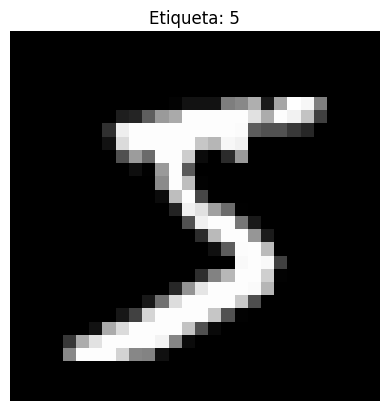

In [8]:
import matplotlib.pyplot as plt

# Mostrar una imagen del conjunto de entrenamiento
plt.imshow(x_train[0], cmap='gray')
plt.title('Etiqueta: ' + str(tf.argmax(y_train[0]).numpy()))
plt.axis('off')
plt.show()

¿Que numero crees que esta en la imagen?

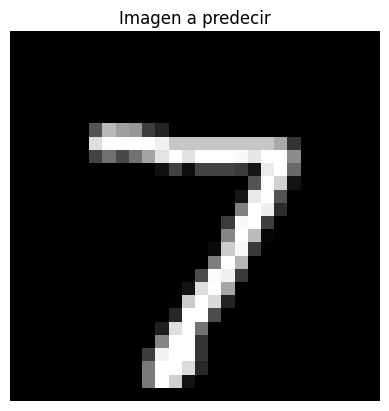

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
Predicción de la red: 7
Etiqueta real: 7


In [9]:
import numpy as np

# Tomamos una imagen del test set
index = 0  # Puedes cambiar este número para ver otras
image = x_test[index].reshape(1, 28, 28)  # Formato correcto para la red

# Mostrar la imagen
plt.imshow(x_test[index], cmap='gray')
plt.title("Imagen a predecir")
plt.axis('off')
plt.show()

# Hacer predicción
prediction = model.predict(image)

# Mostrar resultado
print("Predicción de la red:", np.argmax(prediction))
print("Etiqueta real:", np.argmax(y_test[index]))

¿Como piensa la red?

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


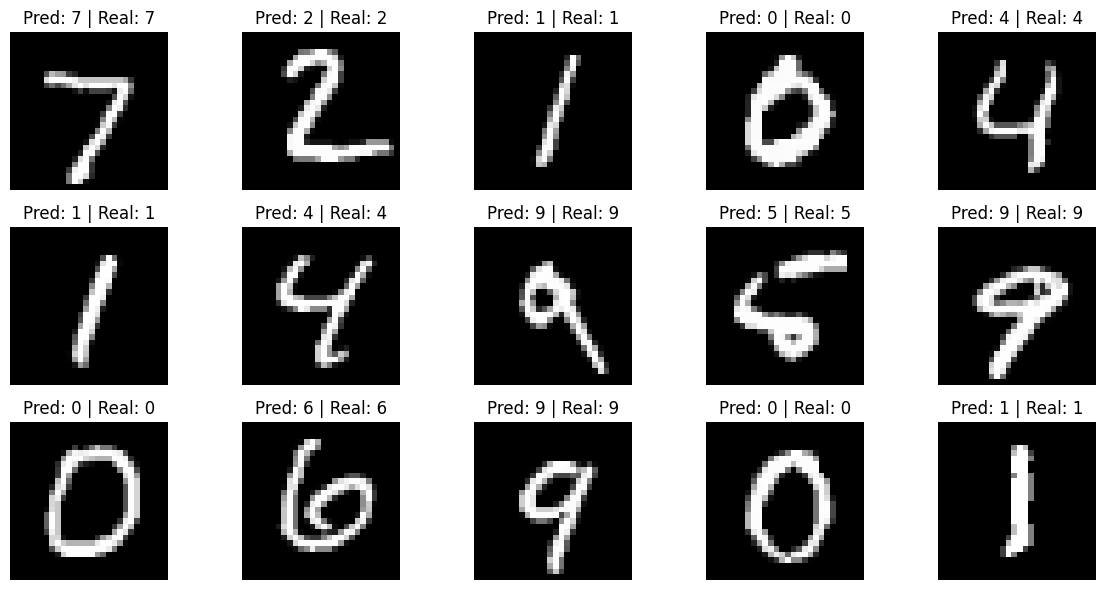

In [10]:
fig, axes = plt.subplots(3, 5, figsize=(12, 6))
for i, ax in enumerate(axes.flat):
    img = x_test[i]
    prediction = model.predict(img.reshape(1, 28, 28))
    pred_label = np.argmax(prediction)
    true_label = np.argmax(y_test[i])

    ax.imshow(img, cmap='gray')
    ax.set_title(f"Pred: {pred_label} | Real: {true_label}")
    ax.axis('off')
plt.tight_layout()
plt.show()

¿En que numero se equivoca más?

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


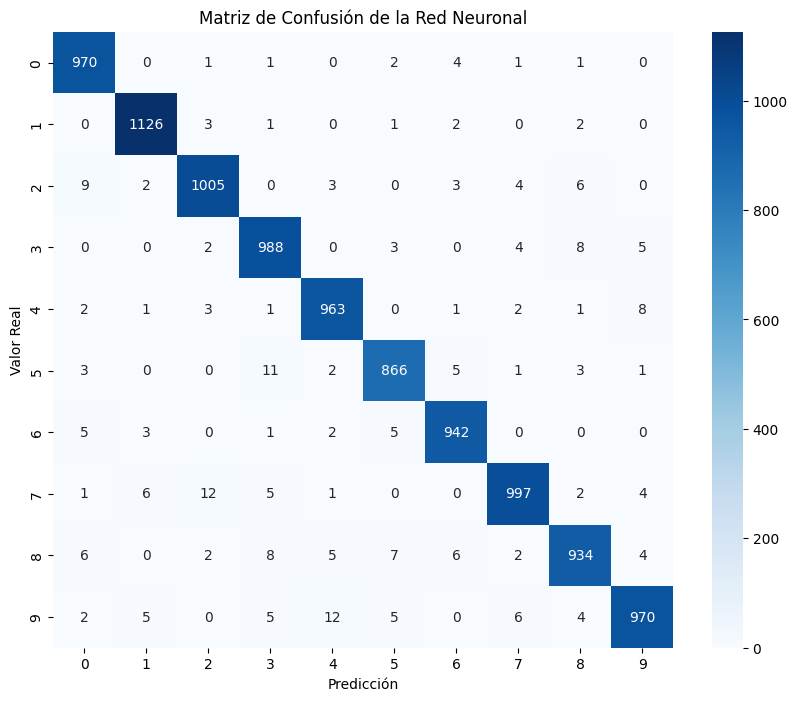

In [12]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Predicciones de todas las imágenes del test set
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Matriz de confusión
cm = confusion_matrix(y_true, y_pred_classes)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicción")
plt.ylabel("Valor Real")
plt.title("Matriz de Confusión de la Red Neuronal")
plt.show()